## O banco de dados contém informações sobre pacientes e seus hábitos de saúde

Perguntas a Serem Respondidas:<br>
	1.	Qual é o IMC médio dos pacientes por faixa etária?<br>
	2.	Existe relação entre a prática de atividade física e a autoavaliação de saúde (satisfação)?<br>
	3.	Qual é a média de consumo de água entre pacientes com e sem doenças crônicas?<br>
	4.	Qual é a distribuição de horas de sono entre fumantes e não fumantes?<br>
	5.	Pacientes com histórico familiar de doenças têm maior propensão a doenças crônicas?<br>
	6.	Qual é a média de horas de sono por país?<br>
	7.	Existe correlação entre o IMC e a prática de atividade física?<br>
	8.	Qual é a distribuição de gêneros dos pacientes da clínica?<br>

In [17]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Gerando dados ficticios
np.random.seed(42)

# Dados fictícios
n = 1000

# Gerar dados
dados = {
    "ID do Paciente": [f"P{i:04}" for i in range(1, n + 1)],
    "Idade": np.random.randint(18, 80, size=n),
    "Gênero": np.random.choice(["Masculino", "Feminino", "Não-binário"], size=n, p=[0.45, 0.45, 0.1]),
    "País": np.random.choice(["Brasil", "EUA", "Canadá", "Alemanha", "Austrália"], size=n, p=[0.4, 0.3, 0.1, 0.1, 0.1]),
    "IMC (Índice de Massa Corporal)": np.round(np.random.uniform(18.5, 40, size=n), 1),
    "Atividade Física (h/semana)": np.round(np.random.uniform(0, 15, size=n), 1),
    "Consumo de Água (litros/dia)": np.round(np.random.uniform(0.5, 5, size=n), 1),
    "Horas de Sono (h/noite)": np.round(np.random.uniform(4, 10, size=n), 1),
    "Doenças Crônicas": np.random.choice(["Sim", "Não"], size=n, p=[0.3, 0.7]),
    "Fumante": np.random.choice(["Sim", "Não"], size=n, p=[0.2, 0.8]),
    "Histórico Familiar de Doenças": np.random.choice(["Sim", "Não"], size=n, p=[0.5, 0.5]),
    "Satisfação com a Saúde (0 a 10)": np.random.randint(0, 11, size=n),
}

# Criar DataFrame
df_saude = pd.DataFrame(dados)

# Visualizar dados gerados
df_saude.head()

,ID do Paciente,Idade,Gênero,País,IMC (Índice de Massa Corporal),Atividade Física (h/semana),Consumo de Água (litros/dia),Horas de Sono (h/noite),Doenças Crônicas,Fumante,Histórico Familiar de Doenças,Satisfação com a Saúde (0 a 10)
0,P0001,56,Masculino,Brasil,37.2,2.5,2.7,4.2,Não,Não,Sim,3
1,P0002,69,Feminino,Brasil,29.8,7.1,1.0,7.0,Não,Não,Sim,9
2,P0003,46,Masculino,EUA,32.1,0.8,3.1,8.6,Não,Não,Não,6
3,P0004,32,Feminino,Brasil,32.4,14.1,1.9,5.6,Não,Não,Não,10
4,P0005,60,Feminino,Brasil,36.1,1.1,3.3,8.8,Não,Não,Sim,5


In [19]:
df_saude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID do Paciente                   1000 non-null   object 
 1   Idade                            1000 non-null   int64  
 2   Gênero                           1000 non-null   object 
 3   País                             1000 non-null   object 
 4   IMC (Índice de Massa Corporal)   1000 non-null   float64
 5   Atividade Física (h/semana)      1000 non-null   float64
 6   Consumo de Água (litros/dia)     1000 non-null   float64
 7   Horas de Sono (h/noite)          1000 non-null   float64
 8   Doenças Crônicas                 1000 non-null   object 
 9   Fumante                          1000 non-null   object 
 10  Histórico Familiar de Doenças    1000 non-null   object 
 11  Satisfação com a Saúde (0 a 10)  1000 non-null   int64  
dtypes: float64(4), int64(

## Iniciando analise


In [28]:
# 1.Qual é o IMC médio dos pacientes por faixa etária?

# Definindo faixa etaria
bins = [18,29,39,49,59,69,79]
labels = ['18-29','30-39','40-49','50-59','60-69','70-79']
df_saude['Faixa Etaria'] = pd.cut(df_saude['Idade'], bins=bins, labels=labels, right=True)

imc_faixa_etaria = df_saude.groupby('Faixa Etaria')['IMC (Índice de Massa Corporal)'].mean()
imc_faixa_etaria

Faixa Etaria
18-29    29.811875
30-39    29.233824
40-49    29.450857
50-59    30.129940
60-69    29.536129
70-79    29.853439
Name: IMC (Índice de Massa Corporal), dtype: float64

Correlação entre prática de atividade física e satisfação com a saúde: -0.05


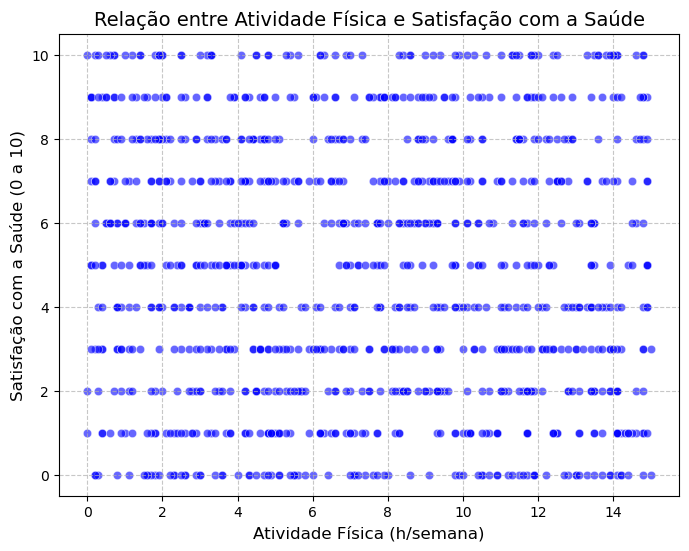

In [26]:
# 2. Existe relação entre a prática de atividade física e a autoavaliação de saúde (satisfação)?

# Calcular a correlação
correlacao = df_saude["Atividade Física (h/semana)"].corr(df_saude["Satisfação com a Saúde (0 a 10)"])
print(f"Correlação entre prática de atividade física e satisfação com a saúde: {correlacao:.2f}")

# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="Atividade Física (h/semana)",
    y="Satisfação com a Saúde (0 a 10)",
    data=df_saude,
    alpha=0.6,
    color="blue"
)
plt.title("Relação entre Atividade Física e Satisfação com a Saúde", fontsize=14)
plt.xlabel("Atividade Física (h/semana)", fontsize=12)
plt.ylabel("Satisfação com a Saúde (0 a 10)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

#### Interpretacao:

1. Correlação muito baixa:
•O valor de correlação de -0.05 indica que não há uma relação linear significativa entre as variáveis “Atividade Física (h/semana)” e “Satisfação com a Saúde (0 a 10)”.
•Em outras palavras, o aumento ou diminuição das horas de atividade física semanal não tem impacto direto sobre a autoavaliação de saúde.

2. Distribuição no gráfico:
•No gráfico de dispersão, os pontos estão espalhados uniformemente, sem formar um padrão claro ou tendência visível (como uma linha crescente ou decrescente).
•Isso confirma a falta de relação entre as duas variáveis.

3. Interpretação prática:
•Embora a prática de atividade física seja geralmente associada a benefícios para a saúde, outros fatores podem estar influenciando a autoavaliação de saúde dos participantes, como:
•Condições de saúde preexistentes.
•Nível de estresse, sono, ou hábitos alimentares.
•Fatores subjetivos, como percepção individual de bem-estar.

In [29]:
# 3. Qual é a média de consumo de água entre pacientes com e sem doenças crônicas?
consumo_agua_doencas_cronicas = df_saude.groupby('Doenças Crônicas')['Consumo de Água (litros/dia)'].mean()
consumo_agua_doencas_cronicas

Doenças Crônicas
Não    2.665205
Sim    2.816041
Name: Consumo de Água (litros/dia), dtype: float64

In [30]:
# 4. Qual é a distribuição de horas de sono entre fumantes e não fumantes?
horas_sono = df_saude.groupby('Fumante')['Horas de Sono (h/noite)'].mean()
horas_sono

Fumante
Não    7.002366
Sim    6.865990
Name: Horas de Sono (h/noite), dtype: float64

In [37]:
# 5. Pacientes com histórico familiar de doenças têm maior propensão a doenças crônicas? ******
historico_familiar = df_saude.groupby('Histórico Familiar de Doenças')['Doenças Crônicas'].count()
historico_familiar

Histórico Familiar de Doenças
Não    505
Sim    495
Name: Doenças Crônicas, dtype: int64

In [38]:
# 6. Qual é a média de horas de sono por país?
horas_sono_pais = df_saude.groupby('País')['Horas de Sono (h/noite)'].mean()
horas_sono_pais

País
Alemanha     7.082524
Austrália    6.904651
Brasil       6.913043
Canadá       7.089109
EUA          7.007432
Name: Horas de Sono (h/noite), dtype: float64

Correlação entre prática de atividade física e IMC: -0.01


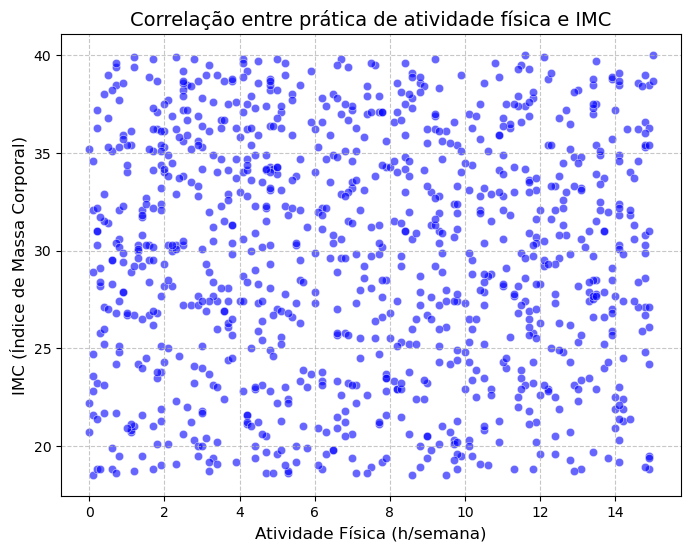

In [40]:
# 7. Existe correlação entre o IMC e a prática de atividade física?

# Calcular a correlação
correlacao_imc_atividade = df_saude["Atividade Física (h/semana)"].corr(df_saude["IMC (Índice de Massa Corporal)"])
print(f"Correlação entre prática de atividade física e IMC: {correlacao_imc_atividade:.2f}")

# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="Atividade Física (h/semana)",
    y="IMC (Índice de Massa Corporal)",
    data=df_saude,
    alpha=0.6,
    color="blue"
)
plt.title("Correlação entre prática de atividade física e IMC", fontsize=14)
plt.xlabel("Atividade Física (h/semana)", fontsize=12)
plt.ylabel("IMC (Índice de Massa Corporal)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [43]:
# 8. Qual é a distribuição de gêneros dos pacientes da clínica?
genero = df_saude.groupby('Gênero')['ID do Paciente'].count()
genero

Gênero
Feminino       495
Masculino      410
Não-binário     95
Name: ID do Paciente, dtype: int64